## 1. Google Play Store apps and reviews
<p>Las aplicaciones m√≥viles est√°n en todas partes. Son f√°ciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se est√°n desarrollando cada vez m√°s aplicaciones. En este ejercicio, haremos un an√°lisis completo del mercado de aplicaciones de Android comparando m√°s de diez mil aplicaciones en Google Play en diferentes categor√≠as. Buscaremos informaci√≥n valiosa en los datos para dise√±ar estrategias que impulsen el crecimiento y la retenci√≥n.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Tenemos dos fuentes de datos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 caracter√≠sticas que describen una aplicaci√≥n determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 rese√±as para cada aplicaci√≥n, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">reviews</a>. El texto de cada rese√±a se ha procesado previamente y se le atribuyen tres caracter√≠sticas nuevas: Sentimiento (positivo, negativo o neutral), Polaridad del sentimiento y Subjetividad del sentimiento..</li>
</ul>

In [26]:
# Importa las librer√≠as de pandas y matplotlin
import pandas as pd 
import matplotlib.pyplot as plt

# Importa el datase apps.csv
ubi_apps =  r"C:\Users\randy\EBAC.PRACTICAS\apps.csv"
apps = pd.read_csv('apps.csv')
# Borra todos los duplicados del dataset
df_sin_duplicados = apps.drop_duplicates()

# Imprime el total de apps que se van a analizar que quedan (dimensi√≥n)
print('Total number of apps in the dataset = ', df_sin_duplicados.shape)

# Imprime la est√°distica descriptiva de resumen
print(df_sin_duplicados.info())
print('---------------------------------------------------------------------------------')
# Vamos a echar un vistazo al DataFrame final
print(df_sin_duplicados.head())

Total number of apps in the dataset =  (9659, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB
None
---------------------------------------------------------------------------------
                

## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con m√°s frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La funci√≥n <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperar√≠amos. Esto se debe a que la columna contiene algunos caracteres m√°s que solo [0,9] d√≠gitos. Idealmente, queremos que estas columnas fueran puramente num√©ricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Espec√≠ficamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

<p>Aqu√≠ un link donde podr√°s ver un poco m√°s a detalle que es una <a href="https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/">funci√≥n lambda</a>

In [27]:
# Lista de caracteres a eliminar
chars_to_remove = [',', '+', '$']
# Lista de las columnas a limpiar
cols_to_clean = ['Installs', 'Price']

# Loop para cada columna
for col in cols_to_clean:
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una funci√≥n lambda el caracter especial por un texto vac√≠o ('')
        df_sin_duplicados[col] = df_sin_duplicados[col].str.replace(char, '', regex=False)
    # Convierte la columna a tipo flotante (float)
    df_sin_duplicados[col] = df_sin_duplicados[col].astype(float)

## 3. Exploring App's categories
<p>Con m√°s de mil millones de usuarios activos en 190 pa√≠ses de todo el mundo, Google Play sigue siendo una importante plataforma de distribuci√≥n para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas m√°s r√°pida y f√°cilmente visibles en Google Play. Para mejorar la experiencia de b√∫squeda general, Google ha introducido el concepto de agrupar aplicaciones en categor√≠as.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¬øQu√© categor√≠a tiene la mayor participaci√≥n de aplicaciones (activas) en el mercado?</li>
<li>¬øAlguna categor√≠a espec√≠fica domina el mercado?</li>
<li>¬øQu√© categor√≠as tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aqu√≠ <code>33</code> categor√≠as unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> tambi√©n est√°n en el top.</p>

Number of categories =  33
---------------------------------------------------------------------------------
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS        

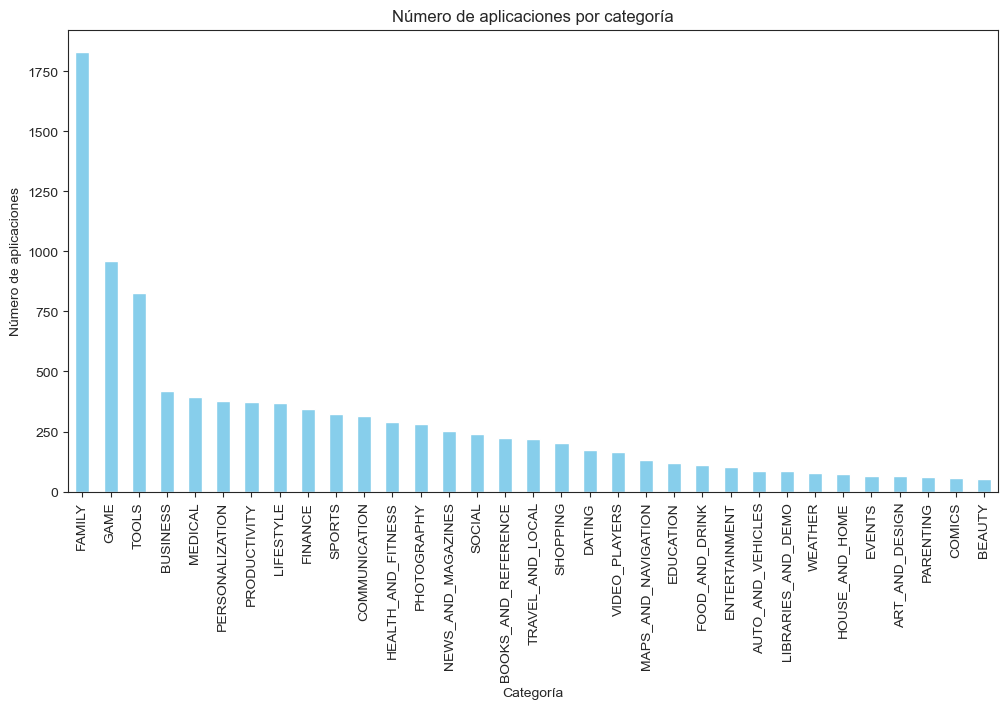

In [28]:
# Imprime el total de categor√≠as √∫nicas
num_categories = df_sin_duplicados['Category'].nunique()
print('Number of categories = ', num_categories)
print('---------------------------------------------------------------------------------')
# Cuenta el n√∫mero de aplicaciones en cada Categor√≠a y ordena de manera descendente 
num_apps_in_category = df_sin_duplicados['Category'].value_counts()
print(num_apps_in_category)
print('---------------------------------------------------------------------------------')
# Muestra el resultado en una gr√°fica de barras
num_apps_in_category.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('N√∫mero de aplicaciones por categor√≠a')
plt.xlabel('Categor√≠a')
plt.ylabel('N√∫mero de aplicaciones')
plt.xticks(rotation=90)
plt.show()

## 4. Ratings Distribution
<p>Despu√©s de analizar la participaci√≥n de mercado para cada categor√≠a de las aplicaciones, veamos c√≥mo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicaci√≥n.</p>

Average app rating =  4.173243045387994
---------------------------------------------------------------------------------
Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIA

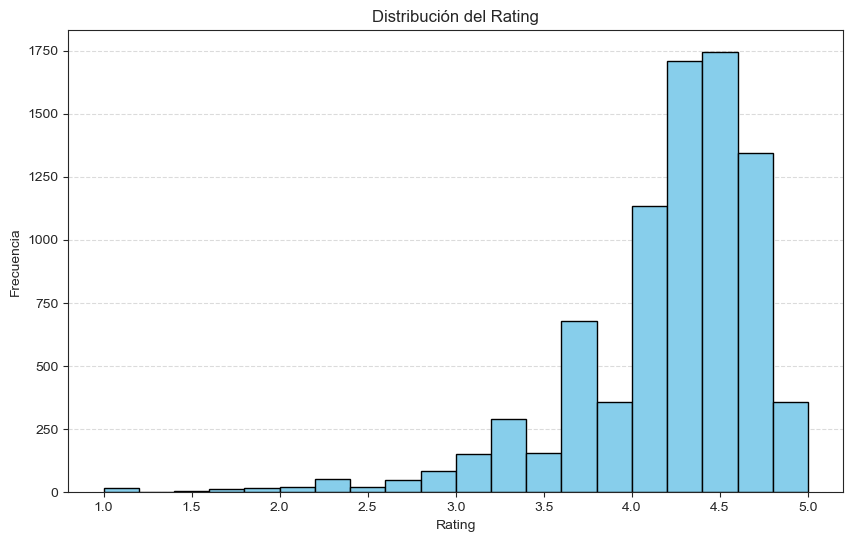

In [29]:
# Calcular el promedio de calificaci√≥n de las apps
avg_app_rating = df_sin_duplicados['Rating'].mean()
print('Average app rating = ', avg_app_rating)
print('---------------------------------------------------------------------------------')
# Calcula el promedio de calificaci√≥n por categor√≠a
promedio_por_categoria = df_sin_duplicados.groupby('Category')['Rating'].mean()
print(promedio_por_categoria)
print('---------------------------------------------------------------------------------')
# Visualiza en un histograma el comportamiento del Rating
plt.figure(figsize=(10, 6))
df_sin_duplicados['Rating'].dropna().plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n del Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tama√±o y el precio de la aplicaci√≥n. En cuanto al tama√±o, si la aplicaci√≥n m√≥vil es demasiado grande, puede ser dif√≠cil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicaci√≥n m√≥vil. Adem√°s, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o econ√≥micas. Estos problemas se agravan si el mercado objetivo es en pa√≠ses en v√≠as de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¬øEl tama√±o de una aplicaci√≥n afecta su calificaci√≥n?</li>
<li>¬øLos usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¬øEl precio de una aplicaci√≥n afecta su calificaci√≥n? </li>
<li>¬øLos usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

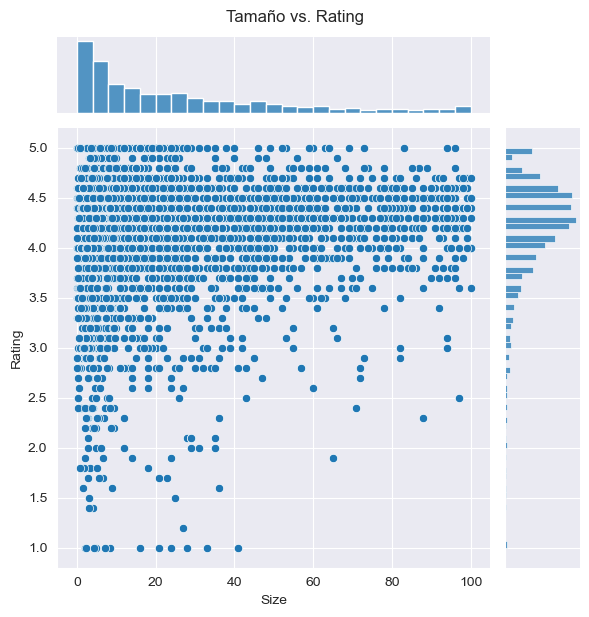

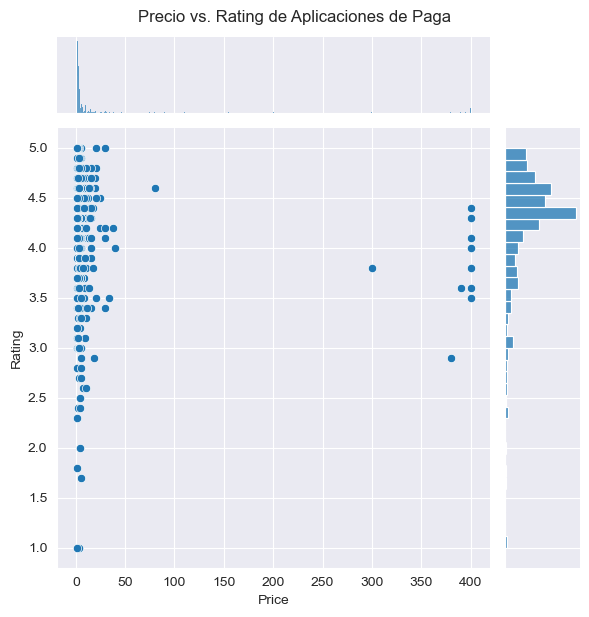

In [30]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = df_sin_duplicados.dropna(subset=['Rating', 'Size'])
apps_with_size_and_rating_present

# Filtra las categor√≠as con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Gr√°fica size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
plt1.fig.suptitle('Tama√±o vs. Rating', y=1.02)

# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = df_sin_duplicados[df_sin_duplicados['Type'] == 'Paid']

# Grafica price vs. rating de las paplicaciones de paga
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
plt2.fig.suptitle('Precio vs. Rating de Aplicaciones de Paga', y=1.02)
plt.show()

## 6. Relation between Category & Price
<p>As√≠ que ahora viene la parte dif√≠cil. ¬øC√≥mo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¬øQu√© estrategias de monetizaci√≥n pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las caracter√≠sticas, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposici√≥n de su cliente a pagar por la aplicaci√≥n. Un precio elevado puede hacer que los clientes no se vean atra√≠dos por descargarlaque ocurra la descarga o pueden eliminar una aplicaci√≥n que han descargado despu√©s de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categor√≠as exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicaci√≥n de calculadora, probablemente deber√≠an mantenerse gratuitas. Sin embargo, tendr√≠a sentido cobrar por una aplicaci√≥n m√©dica altamente especializada que diagnostica a pacientes diab√©ticos, as√≠ que vamos a descubrir y encontrar la respuesta</p>

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         üíé I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢  399.99

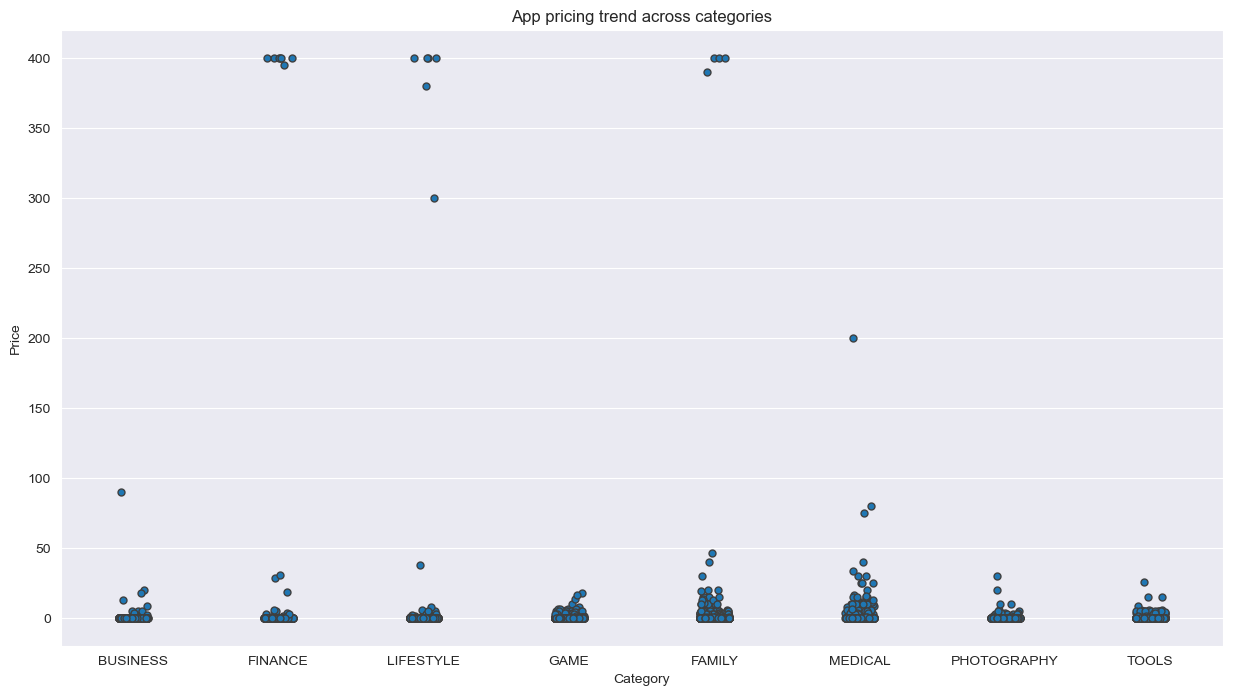

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categor√≠as populares
popular_app_cats = df_sin_duplicados[df_sin_duplicados.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categor√≠a
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Selecciona las apps con un precio mayor a 200
apps_above_200 = df_sin_duplicados[df_sin_duplicados['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 7. Paid apps vs Free apps
<p>Para las aplicaciones de Play Store en la actualidad, existen cinco tipos de estrategias de precios: gratis, "freemium", de pago, "paymium" y de suscripci√≥n. Centr√©monos solo en aplicaciones gratuitas y de pago. 

Algunas caracter√≠sticas de las aplicaciones gratuitas son:</p>
<ul>
<li>Libres de descarga.</li>
<li>La principal fuente de ingresos a menudo proviene de la publicidad.</li>
<li>Por lo general son creadaa por empresas que tienen otros productos y la aplicaci√≥n sirve como una extensi√≥n de esos productos.</li>
<li>Puede servir como una herramienta para la retenci√≥n de clientes, la comunicaci√≥n y el servicio al cliente.</li>
</ul>
<p>Algunas caracter√≠sticas de las aplicaciones de paga son:</p>
<ul>
<li>Tienen un tiempo de servicio de prueba gratuito, esto para que el usuario pueda conocerla.</li>
<li>Ofrecen un servicio de mayor especialidad.</li>
</ul>
<p>¬øAdem√°s de esto que otras caracter√≠sticas diferenc√≠as a las aplicaciones de pago las aplicaciones gratuitas?</p>

# Aplicaciones Gratuitas:

### Mayor alcance de usuarios: Al ser gratuitas, suelen atraer a un p√∫blico m√°s amplio.
### Actualizaciones financiadas por anuncios: Las actualizaciones y mejoras suelen depender de los ingresos generados por la publicidad.
### Menor compromiso del usuario: Los usuarios pueden desinstalarlas f√°cilmente si no cumplen sus expectativas, ya que no hay inversi√≥n inicial.
### Frecuente uso de compras dentro de la app: Aunque son gratuitas, pueden incluir compras opcionales para desbloquear funciones adicionales.

# Aplicaciones de Pago:

### Sin anuncios: Generalmente no incluyen publicidad, lo que mejora la experiencia del usuario.
### Mayor percepci√≥n de calidad: Los usuarios suelen asociar las aplicaciones de pago con un producto m√°s profesional o especializado.
### Soporte t√©cnico dedicado: Las aplicaciones de pago suelen ofrecer un soporte t√©cnico m√°s personalizado y r√°pido.
### Actualizaciones regulares: Las actualizaciones y mejoras suelen ser m√°s frecuentes y de mayor calidad, ya que los ingresos provienen directamente de los usuarios.
### Mayor retenci√≥n de usuarios: Los usuarios que pagan por una aplicaci√≥n tienden a comprometerse m√°s con su uso, ya que han invertido dinero en ella

## 8. Sentiment analysis
<p>La miner√≠a de datos de rese√±as de usuarios para determinar c√≥mo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una t√©cnica llamada an√°lisis de sentimientos. Las rese√±as de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de √°nimo es positivo, negativo o neutral con respecto a esa aplicaci√≥n. Por ejemplo, las palabras positivas en la revisi√≥n de una aplicaci√≥n pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

<p>¬øQu√© podemos decir acerca del analisis de sentimiento de las aplicaciones?</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

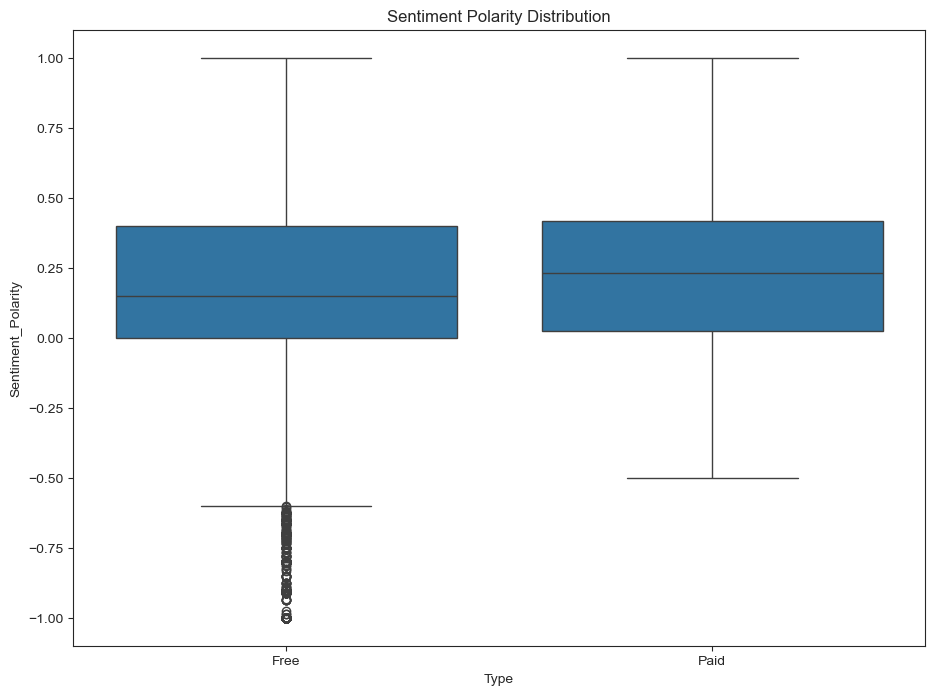

In [32]:
# Carga el archivo user_reviews.csv
reviews_df = r"C:\Users\randy\EBAC.PRACTICAS\user_reviews.csv"
reviews_df = pd.read_csv('user_reviews.csv')
# Une los dos DataFrames (join)
merged_df = pd.merge(df_sin_duplicados, reviews_df, on='App', how='inner')

# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
merged_df.head()
# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
ax.set_title('Sentiment Polarity Distribution')

## 9. Conclusion
<p>En este cuaderno, analizamos m√°s de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para poder encontrar informaci√≥n valiosa por si alguna vez deseamos crear una aplicaci√≥n nosotros mismos. Espero que hayas disfrutado el curso!!! :)
    
Atte. <a href="https://www.linkedin.com/in/ivan-alducin-a87a71108/">Ivan Alducin</a></p>